In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [0]:
dataset=keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

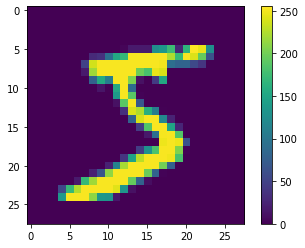

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

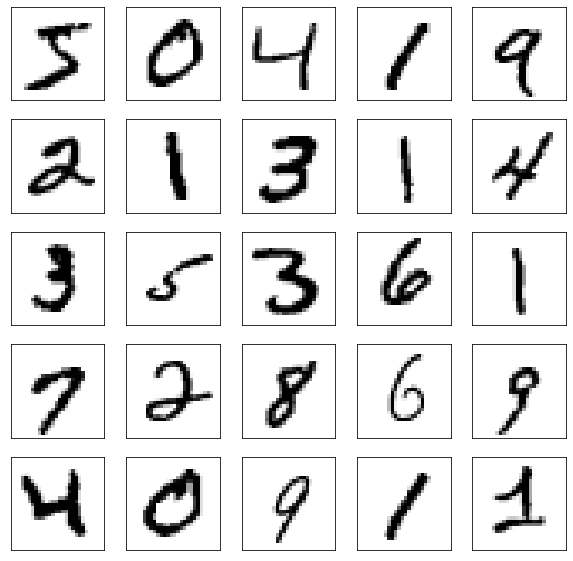

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2613 - accuracy: 0.9249
Epoch 2/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1148 - accuracy: 0.9664
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0790 - accuracy: 0.9759
Epoch 4/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0598 - accuracy: 0.9821
Epoch 5/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0448 - accuracy: 0.9861
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0362 - accuracy: 0.9884
Epoch 7/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0294 - accuracy: 0.9911
Epoch 8/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0243 - accuracy: 0.9924
Epoch 9/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0194 - accuracy: 0.9939
Epoch 10/10
6

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.0785 - accuracy: 0.9773

Test accuracy: 0.9773


In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [0]:
predictions[0]

array([1.1604221e-09, 9.6326995e-11, 8.5676811e-07, 1.0466454e-06,
       6.3205164e-16, 2.5918644e-11, 1.1348798e-17, 9.9999809e-01,
       1.3414408e-09, 4.5210705e-08], dtype=float32)

In [0]:
np.argmax(predictions[0])

7

In [0]:
test_labels[0]

7

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [0]:
class_names=['0','1','2','3','4','5','6','7','8','9']

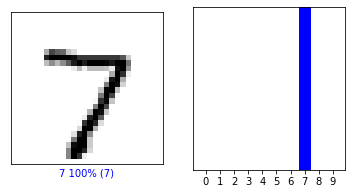

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

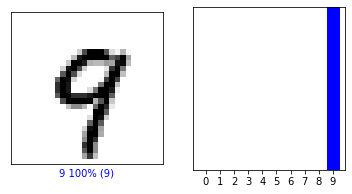

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

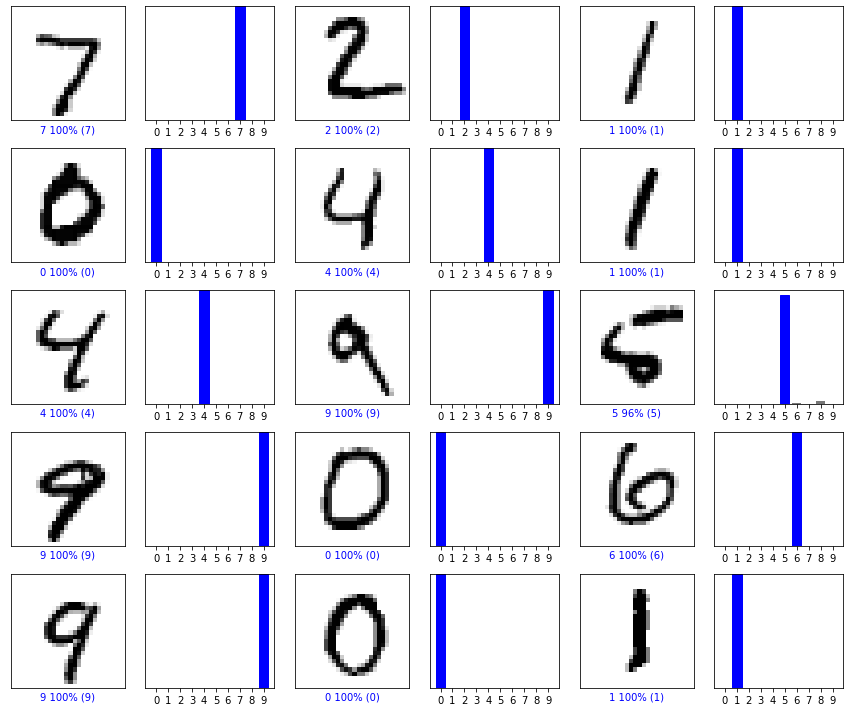

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [0]:
img = test_images[1]

print(img.shape)

(28, 28)


In [0]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [0]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.3531335e-12 3.7874088e-07 9.9999964e-01 6.1414824e-09 1.0482953e-21
  5.7479585e-13 2.6687662e-12 8.5832873e-17 1.0725026e-09 3.3819616e-15]]


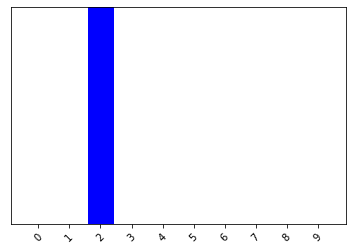

In [0]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [0]:
np.argmax(predictions_single[0])

2